In [1]:
import numpy as np
import pandas as pd
import scipy
from scipy import stats
import matplotlib.pyplot as plt
from IPython.display import Math, display
import sympy as sp
from sympy.physics.units.systems import SI
from sympy.physics.units import meter, second, liter, hour, degree, convert_to
from sympy import sin, cos, pi, Abs
import math

sp.init_printing()

def show(*args):
    out = ""
    for arg in args:
        if isinstance(arg, (sp.Expr, sp.Eq)):
            arg = sp.latex(arg)
        else:
            arg = str(arg)
        out += arg
    display(Math(out))
    
qq = "\quad "

In [2]:
from sympy.abc import rho, epsilon, mu, Q, L, d, f
P = sp.symbols('P')

tururu = sp.Eq(P, f * 8 * rho * Q**2 * L / (sp.pi**2 * d**5))
F = sp.solve(tururu, f)
show('f = ', F)

<IPython.core.display.Math object>

In [3]:
from sympy.abc import rho, epsilon, mu, Q, L, d, f
Re = sp.symbols('Re')

DP = f * 8 * rho * Q**2 * L / (sp.pi**2 * d**5)
show('\Delta P = ', DP)

f = 1 / (-1.8 * sp.log(6.9 / Re + (epsilon/d/3.7)**1.11))**2
show('f = ', f)

Re = 4 * Q * rho / (sp.pi * mu * d)
show('Re =', Re)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [4]:
Re = 4 * Q * rho / (sp.pi * mu * d)
f = 1 / (-1.8 * sp.log(6.9 / Re + (epsilon/d/3.7)**1.11))**2
show('f = ', f)

<IPython.core.display.Math object>

VERIFICACIÓ I VALIDACIÓ

Index(['Flow (l/s)', '\Delta P (Pa)'], dtype='object')


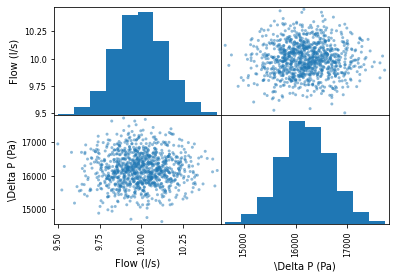

In [5]:
# Dades
data = pd.read_csv("C:/Users/onasa/Documents/3r2n_semestre/Mod_Sim/Entrega5/dp_data.csv")
print(data.columns)

l = pd.plotting.scatter_matrix(data[data.columns])

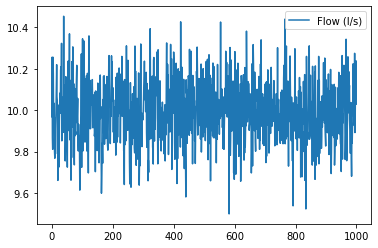

In [10]:
data.plot(y='Flow (l/s)')

In [6]:
print(data.mean(), '\n', data.std())

Flow (l/s)           9.992599
\Delta P (Pa)    16201.240000
dtype: float64 
 Flow (l/s)         0.151722
\Delta P (Pa)    491.664720
dtype: float64


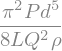

In [7]:
###CÀLCUL DE F AMB CAIGUDA DE PRESSIÓ
F = (sp.pi**2 * P * d**5)/(8*L*Q**2 *rho)
F

In [8]:
# Simulació
valors = {rho: 1000, epsilon: 0.01, mu: 1.2E-3, L: 1000, d: 0.15}
show('F = ', F.subs(valors))

<IPython.core.display.Math object>

0.015210729373351337 0.0006472263465562045


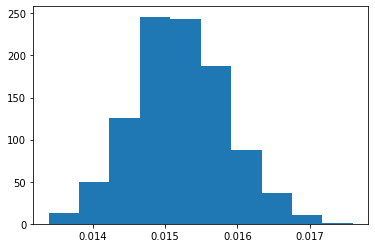

In [9]:
fF = sp.lambdify([Q, P], F.subs(valors))
q = data['Flow (l/s)'] / 1000
p = data['\Delta P (Pa)']
dp = fF(q,p)

l = plt.hist(dp)
print(np.mean(dp), np.std(dp))

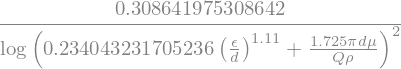

In [10]:
###CÀLCUL DE F SENSE CAIGUDA DE PRESSIÓ
f

In [11]:
# Simulació
valors = {rho: 1000, epsilon: 0.01, mu: 1.2E-3, L: 1000, d: 0.15}
show('f = ', f.subs(valors))

<IPython.core.display.Math object>

0.015587474381093267 8.88999856144672e-07


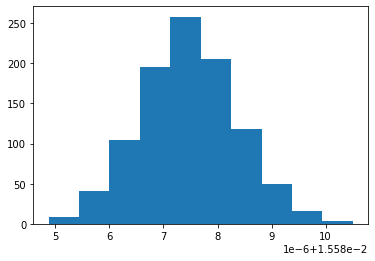

In [12]:
ff = sp.lambdify(Q,f.subs(valors))
q = data['Flow (l/s)'] / 1000
dp2 = ff(q)

l = plt.hist(dp2)
print(np.mean(dp2), np.std(dp2))

0.00037674500774192987


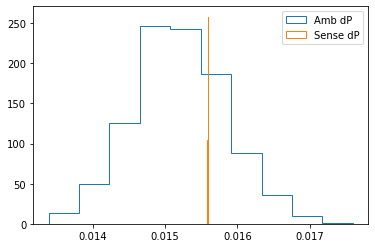

In [13]:
# DISCREPÀNCIA
# S --> calculada per nosaltres
# D --> la del model (la bona)
S = np.mean(dp2)
D = np.mean(dp)
E = S - D
print(E)

l = plt.hist(dp, histtype='step')
l = plt.hist(dp2, histtype='step')
l = plt.legend(['Amb dP', 'Sense dP'])

In [14]:
data['Flow (l/s)'].std()

(array([  4.,  19.,  57., 153., 232., 240., 173.,  83.,  31.,   8.]),
 array([ 9.499 ,  9.5945,  9.69  ,  9.7855,  9.881 ,  9.9765, 10.072 ,
        10.1675, 10.263 , 10.3585, 10.454 ]),
 <a list of 1 Patch objects>)

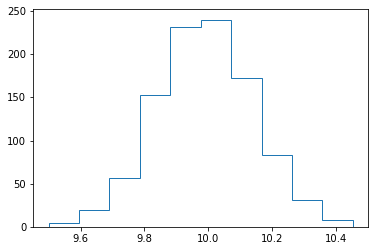

In [13]:
plt.hist(data['Flow (l/s)'], histtype='step')

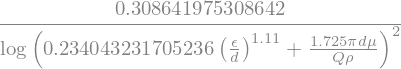

In [15]:
### INCERTESES
Re = 4 * Q * rho / (sp.pi * mu * d)
f = 1 / (-1.8 * sp.log(6.9 / Re + (epsilon/d/3.7)**1.11))**2
f

In [28]:
# Derivades parcials
mesures = {Q: q.mean()}
valors = {rho: 1000, epsilon: 0.01, mu: 1.2E-3, L: 1000, d: 0.15}

DE = sp.diff(f, epsilon).subs(valors).subs(mesures).n()
Dd = sp.diff(f, d).subs(valors).subs(mesures).n()
Dm = sp.diff(f, mu).subs(valors).subs(mesures).n()
DQ = sp.diff(f, Q).subs(valors).subs(mesures).n()
Dr = sp.diff(f, rho).subs(valors).subs(mesures).n()
show(DE, qq, Dd, qq, Dm, qq, DQ, qq, Dr, qq)

<IPython.core.display.Math object>

In [29]:
# Incertesa dels paràmetres al quadrat
up2 = np.sum(np.power([
    DE * valors[epsilon] * 0.001,
    DQ * q.std(),
    Dm * valors[mu] * 0.001,
    Dd * valors[d] * 0.001,
    Dr * valors[rho] * 0.001,
], 2))
up2

In [32]:
# Incertesa de l'estimació de la discrepància
#uD = data.std()['\Delta P (Pa)']
uD = np.std(dp) # dp és el model amb caiguda --> amb el k comparem

uV = np.sqrt(float(uD**2 + up2))
uV

In [35]:
# Discrepància
show("E = %0.4f \pm %0.4f N" % (E, uV))

<IPython.core.display.Math object>

In [34]:
# Error relatiu del model
ur = E/S
ur

In [24]:
# Nivell de confiança per un error del 5%
t = 0.05 / ur
l, h = stats.t.cdf([-t, t], 1000)
CL = h - l
CL